In [29]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [2]:
##### results from paper (Cuomo*, Seaton*, McCarthy* et al Nat Commun 2020)

In [3]:
# union of ips + mesendo + defendo eQTL (pseudobulk, expanded K)

In [4]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [5]:
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [6]:
### combine results

In [7]:
leads = rbind(leads.ips, leads.mes, leads.defendo)

In [8]:
leads$ensembl_gene_id = gsub("_.*","",leads$feature)

In [9]:
head(leads,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage,ensembl_gene_id
-1.0048674,0.08005311,3.631688e-34,3.851118e-36,5_149826526_C_T,ENSG00000164587_RPS14,2.880363e-30,5,149826526,C,...,0.56508683,0.6296458,0.004683908,0.5159591,0.7734028,0.6450821,0.6001209,0.9876646,ips,ENSG00000164587
-0.9881017,0.08648823,2.432216e-26,3.147553e-30,11_57283988_C_T,ENSG00000134809_TIMM10,8.853960e-23,11,57283988,C,...,0.08194005,0.6897261,0.683497330,0.5137511,0.7877572,0.6064095,0.5419861,0.5654441,ips,ENSG00000134809


In [10]:
#### pick top SNP per gene (min p-value across stages)

In [11]:
nrow(leads)
leads = leads[order(leads$p_value),]
leads = leads[-which(duplicated(leads$feature)),]
nrow(leads)

[1] 32665

[1] 10788

In [12]:
# input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
# write.csv(leads[,c("feature","chrom")], paste0(input_files_dir,"genes_tested.csv"))

In [13]:
# load all results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [14]:
res.ips$stage = "ips"
res.mes$stage = "mesendo"
res.defendo$stage = "defendo"

In [15]:
res = rbind(res.ips, res.mes, res.defendo)

In [16]:
res$ensembl_gene_id = gsub("_.*","",res$feature)

In [17]:
head(res,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,permutation_0,permutation_1,permutation_2,permutation_3,...,permutation_6,permutation_7,permutation_8,permutation_9,ensembl_gene_id,chrom,pos,ref_allele,alt_allele,stage
0.1034053,0.1156505,1,0.3712581,1_100712195_G_C,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100712195,G,C,ips
0.1034053,0.1156505,1,0.3712581,1_100713300_G_T,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100713300,G,T,ips


In [18]:
#### pick top eQTL per stage (min p-value across stages)

In [19]:
res$eqtl = paste0(res$feature,"-",res$snp_id)
nrow(res)

[1] 16059303

In [20]:
res = res[order(res$p_value),]
res = res[-which(duplicated(res$eqtl)),]
nrow(res)

[1] 5567940

In [21]:
##### CellRegMap association test

In [24]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"
crm_file = paste0(revision_folder, "CRM_association/summary.csv")

In [25]:
crm = read.csv(crm_file, row.names=1)
colnames(crm) = c("feature_id", "n_snps", "feature_chromosome","p_value","snp_id","p_value_Bonferroni") 
nrow(crm)
head(crm,2)

[1] 10003258

,feature_id,n_snps,feature_chromosome,p_value,snp_id,p_value_Bonferroni
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [26]:
# number of genes
df0 = crm
length(unique(df0$feature_id))

[1] 10493

In [27]:
df = df0[order(df0$p_value),]
df = df[-which(duplicated(df$feature_id)),]

In [30]:
df$qv = qvalue(df$p_value)$qvalues

In [31]:
####################
#### merge

In [32]:
genes_new = as.character(unique(df0$feature_id))
genes_old = as.character(unique(res$ensembl_gene_id))

In [33]:
length(genes_old)
head(genes_old,2)

[1] 10788

[1] "ENSG00000163682" "ENSG00000226278"

In [34]:
length(genes_new)
head(genes_new,2)

[1] 10493

[1] "ENSG00000250462" "ENSG00000131558"

In [35]:
common_genes = genes_new[genes_new %in% genes_old]
length(common_genes)

[1] 10493

In [36]:
########## new leads & old results

In [37]:
df$ensembl_gene_id = df$feature_id

In [38]:
df1 = inner_join(df,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [39]:
nrow(df1)

[1] 4600

In [40]:
cor.test(-log10(df1$p_value.new),-log10(df1$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df1$p_value.new) and -log10(df1$p_value.old)
t = 89.003, df = 4598, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7845814 0.8058203
sample estimates:
     cor 
0.795445 


In [88]:
options(repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df1, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_classic() + geom_abline()

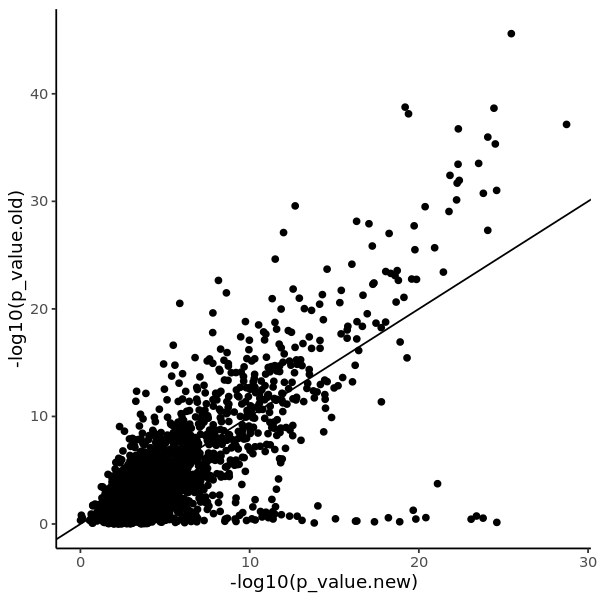

In [89]:
p

In [90]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF4_scatter_newleads.pdf"), width=5, height=5)
p
dev.off()

png 
  2

In [48]:
########## old leads & new results

In [49]:
df0$ensembl_gene_id = df0$feature_id
df2 = inner_join(df0,leads, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [50]:
nrow(df2)

[1] 10493

In [51]:
cor.test(-log10(df2$p_value.new),-log10(df2$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df2$p_value.new) and -log10(df2$p_value.old)
t = 157.35, df = 10491, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8323037 0.8436953
sample estimates:
      cor 
0.8380908 


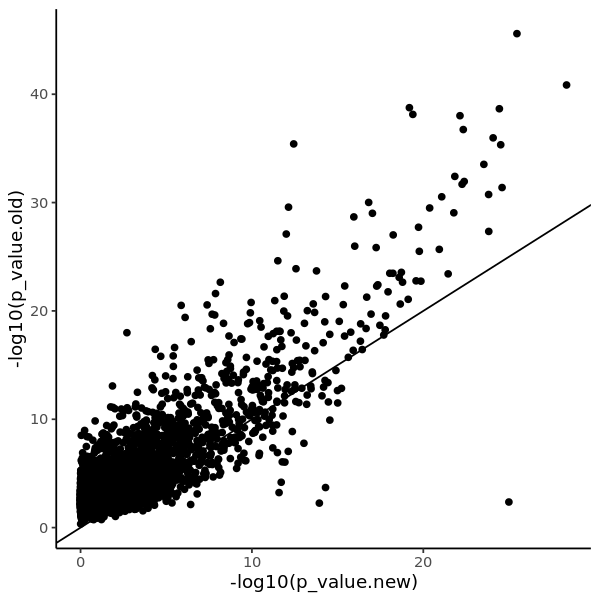

In [84]:
options(repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df2, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_classic() + geom_abline()
p

In [85]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF4_scatter_oldleads.pdf"), width=5, height=5)
p
dev.off()

png 
  2

In [91]:
########## old & new results

In [92]:
df3 = inner_join(df0,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [93]:
nrow(df3)

[1] 5413076

In [94]:
cor.test(-log10(df3$p_value.new),-log10(df3$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df3$p_value.new) and -log10(df3$p_value.old)
t = 2829.5, df = 5413074, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7720667 0.7727463
sample estimates:
      cor 
0.7724067 


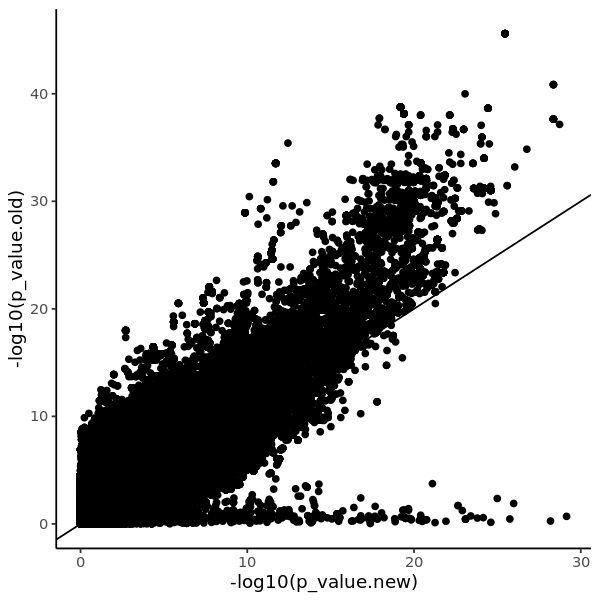

In [96]:
p = ggplot(df3, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_classic() + geom_abline()
p

In [97]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF4_scatter_allresults.pdf"), width=5, height=5)
p
dev.off()

png 
  2